## 1

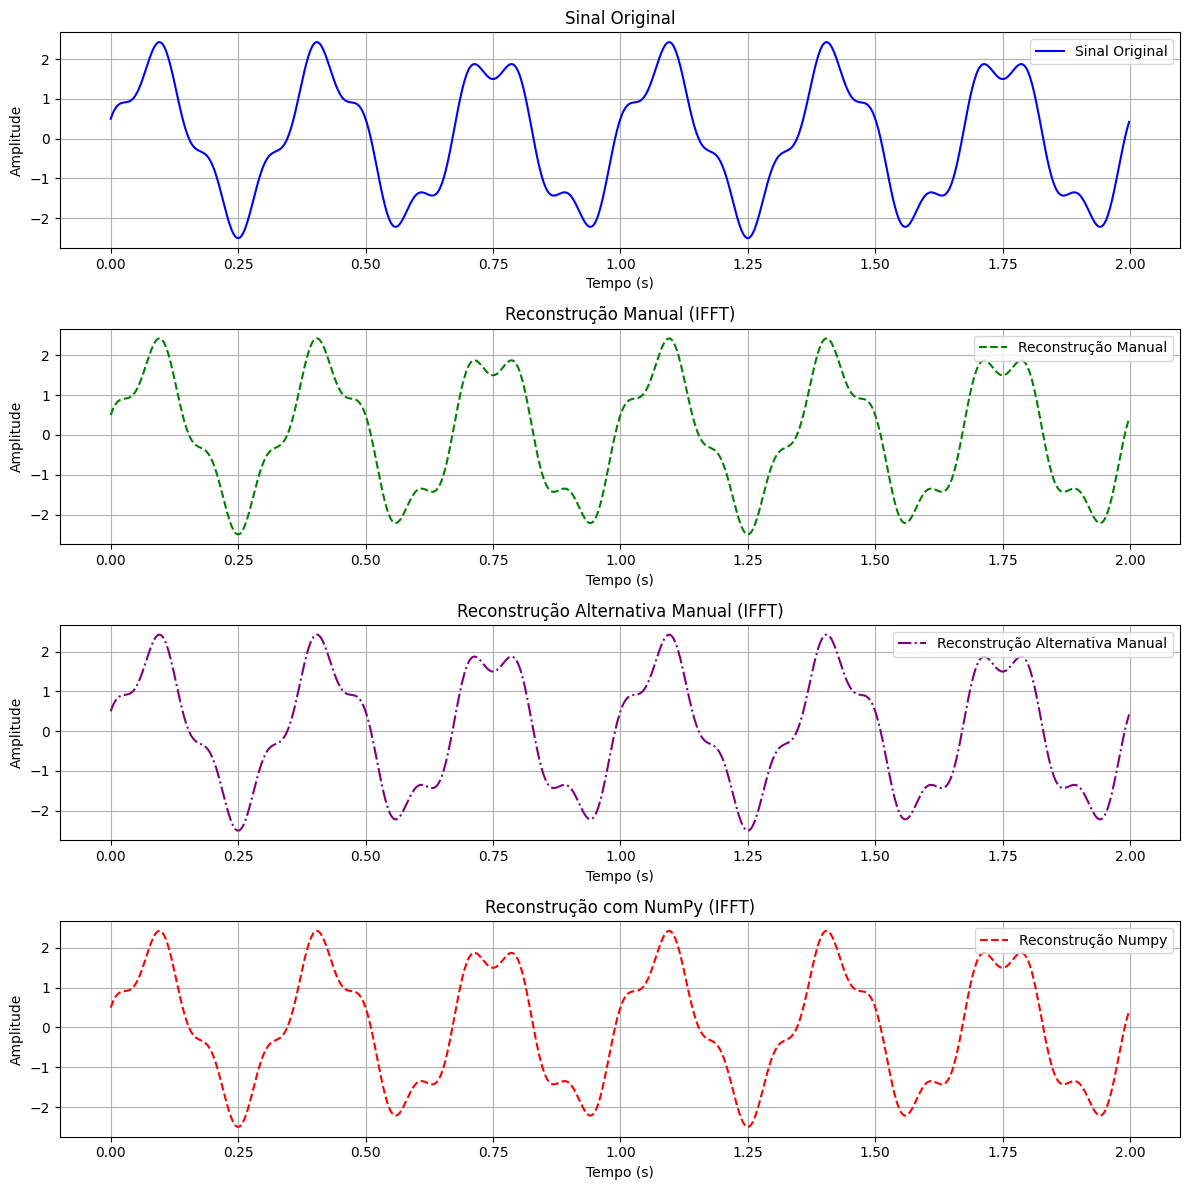

Tabela de Resultados:
             Método  Energia do Sinal
0          Original            2125.0
1   FFT/IFFT Manual            2125.0
2  IFFT Alternativa            2125.0
3        IFFT Numpy            2125.0


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parâmetros
fs = 500  # Frequência de amostragem (Hz)
T = 2     # Duração do sinal (segundos)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Vetor de tempo
f_t = 2 * np.sin(2 * np.pi * 3 * t) + 0.5 * np.cos(2 * np.pi * 10 * t)  # Novo sinal

# Funções manuais e com funções prontas
def fft_manual(signal):
    N = len(signal)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return X

def ifft_manual(fft_signal):
    N = len(fft_signal)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += fft_signal[k] * np.exp(2j * np.pi * k * n / N)
    return x / N

# Nova função: IFFT Alternativa Manual
def ifft_alternative_manual(fft_signal):
    N = len(fft_signal)
    x = np.zeros(N, dtype=complex)
    for k in range(N):
        real_part = 0
        imag_part = 0
        for n in range(N):
            angle = 2 * np.pi * k * n / N
            real_part += fft_signal[n].real * np.cos(angle) - fft_signal[n].imag * np.sin(angle)
            imag_part += fft_signal[n].real * np.sin(angle) + fft_signal[n].imag * np.cos(angle)
        x[k] = (real_part + 1j * imag_part) / N
    return x

def fft_numpy(signal):
    return np.fft.fft(signal)

def ifft_numpy(fft_signal):
    return np.fft.ifft(fft_signal).real

# Aplicação das funções
fft_manual_result = fft_manual(f_t)
ifft_manual_result = ifft_manual(fft_manual_result)
ifft_alternative_result = ifft_alternative_manual(fft_manual_result)

fft_numpy_result = fft_numpy(f_t)
ifft_numpy_result = ifft_numpy(fft_numpy_result)

# Cálculo da energia dos sinais
energy_original = np.sum(np.abs(f_t)**2)
energy_manual = np.sum(np.abs(ifft_manual_result)**2)
energy_alternative = np.sum(np.abs(ifft_alternative_result)**2)
energy_numpy = np.sum(np.abs(ifft_numpy_result)**2)

# Criando tabela de resultados
results = pd.DataFrame({
    "Método": ["Original", "FFT/IFFT Manual", "IFFT Alternativa", "IFFT Numpy"],
    "Energia do Sinal": [energy_original, energy_manual, energy_alternative, energy_numpy]
})

# Gerando gráficos
plt.figure(figsize=(12, 12))

# Sinal original
plt.subplot(4, 1, 1)
plt.plot(t, f_t, label='Sinal Original', color='blue')
plt.title("Sinal Original")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Reconstrução manual
plt.subplot(4, 1, 2)
plt.plot(t, ifft_manual_result.real, label='Reconstrução Manual', color='green', linestyle='--')
plt.title("Reconstrução Manual (IFFT)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Reconstrução alternativa manual
plt.subplot(4, 1, 3)
plt.plot(t, ifft_alternative_result.real, label='Reconstrução Alternativa Manual', color='purple', linestyle='-.')
plt.title("Reconstrução Alternativa Manual (IFFT)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Reconstrução com NumPy
plt.subplot(4, 1, 4)
plt.plot(t, ifft_numpy_result, label='Reconstrução Numpy', color='red', linestyle='--')
plt.title("Reconstrução com NumPy (IFFT)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Exibir tabela de resultados
print("Tabela de Resultados:")
print(results)


## 2

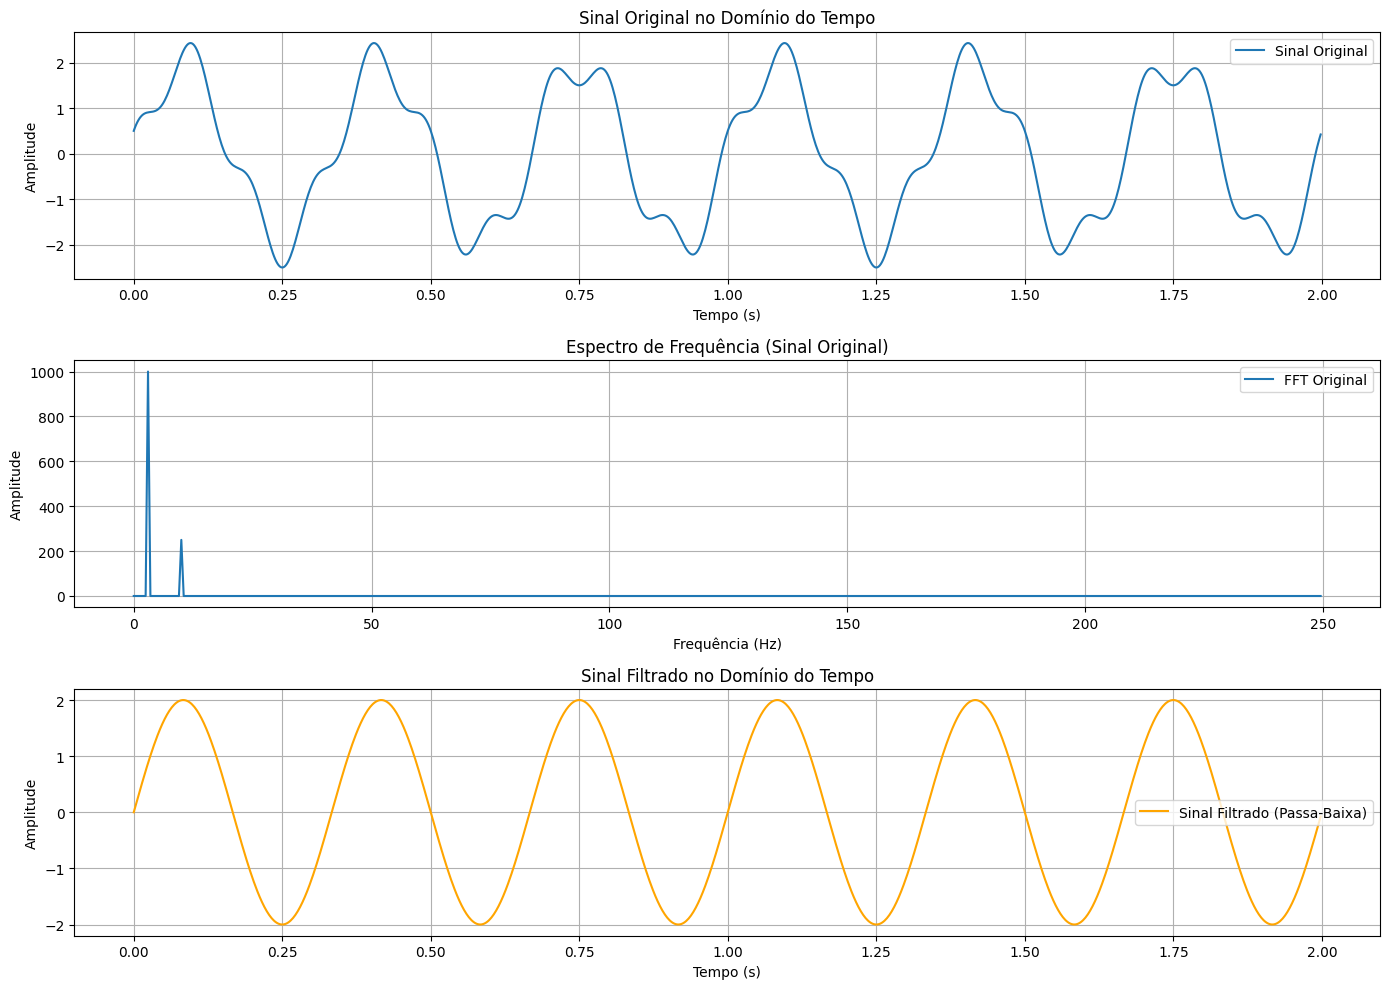

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal
fs = 500  # Frequência de amostragem (Hz)
T = 2     # Duração do sinal (segundos)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Vetor de tempo

# Sinal original: soma de uma senóide e um cosseno
signal = 2 * np.sin(2 * np.pi * 3 * t) + 0.5 * np.cos(2 * np.pi * 10 * t)

# FFT do sinal (transformada para o domínio da frequência)
fft_signal = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(t), d=1/fs)  # Frequências associadas ao FFT

# Aplicação do filtro passa-baixa (frequências > 5 Hz são zeradas)
fft_filtered = fft_signal.copy()
fft_filtered[np.abs(frequencies) > 5] = 0  # Zerar frequências acima de 5 Hz

# Sinal filtrado: transformada inversa (domínio do tempo)
filtered_signal = np.fft.ifft(fft_filtered).real

# Plotando os resultados
plt.figure(figsize=(14, 10))

# Gráfico 1: Sinal original no domínio do tempo
plt.subplot(3, 1, 1)
plt.plot(t, signal, label="Sinal Original")
plt.title("Sinal Original no Domínio do Tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Gráfico 2: Espectro de frequência (FFT)
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal)[:len(frequencies)//2], label="FFT Original")
plt.title("Espectro de Frequência (Sinal Original)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Gráfico 3: Sinal filtrado no domínio do tempo
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label="Sinal Filtrado (Passa-Baixa)", color="orange")
plt.title("Sinal Filtrado no Domínio do Tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## 3

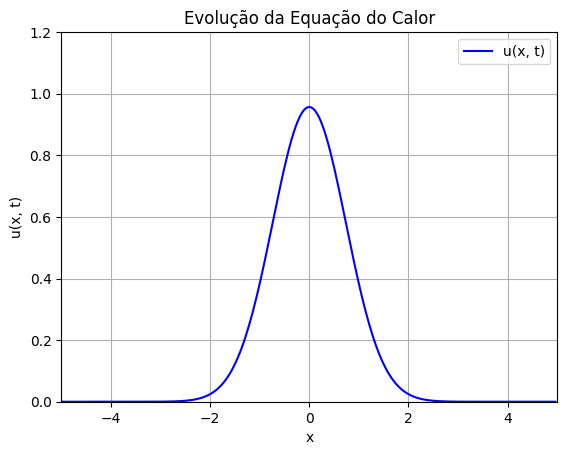

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definindo a função Heaviside
def heaviside(x):
    return 1.0 * (x >= 0)

# Definindo a função f(x)
def f(x):
    return heaviside(np.pi - np.abs(x)) * (2 * np.cos(x) + 2)

# Definindo a função w(x, v, t) - usada para quadratura numérica
def w(x, v, t):
    return (1 / np.sqrt(2 * np.pi)) * ((2 * np.cos(v) + 2) / np.sqrt(2 * t)) * np.exp(-((x - v) ** 2))

# Definindo a integral u(x, t) usando quadratura numérica
def u(x, t):
    v = np.linspace(-np.pi, np.pi, 1000)  # pontos de integração
    integrand = w(x, v, t)
    integral = np.trapz(integrand, v)
    return integral

# Parâmetros do problema (adaptados para o contexto do calor)
L = 10          # Comprimento da barra
N = 256         # Número de pontos espaciais
dx = L / N      # Espaçamento entre os pontos
x = np.linspace(-L / 2, L / 2, N, endpoint=False)  # Posições no espaço
alpha = 0.01    # Coeficiente de difusão térmica
dt = 0.1        # Passo de tempo
T = 2           # Tempo total de simulação
timesteps = int(T / dt)  # Número de passos de tempo

# Condição inicial: uma função gaussiana (como exemplo)
u0 = np.exp(-x**2)
u = u0.copy()

# Frequências associadas ao domínio (transformada de Fourier)
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Função para atualizar a solução no domínio da frequência
def update_fft(u_hat, dt, alpha):
    return u_hat * np.exp(-alpha * (k**2) * dt)

# Transformada inicial de Fourier
u_hat = np.fft.fft(u)

# Criando a animação
fig, ax = plt.subplots()
line, = ax.plot(x, u, label="u(x, t)", color='blue')
ax.set_xlim(-L / 2, L / 2)
ax.set_ylim(0, 1.2)
ax.set_title("Evolução da Equação do Calor")
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.legend()
plt.grid()

def animate(n):
    global u_hat, u
    # Atualiza a solução no domínio da frequência
    u_hat = update_fft(u_hat, dt, alpha)
    # Aplica a transformada inversa para voltar ao domínio do tempo
    u = np.fft.ifft(u_hat).real
    line.set_ydata(u)  # Atualiza os dados da linha na animação
    return line,

# Criação da animação
ani = FuncAnimation(fig, animate, frames=timesteps, blit=True)

# Salvando a animação como GIF
ani.save('heat_equation.gif', writer=PillowWriter(fps=20))

plt.show()


## 4

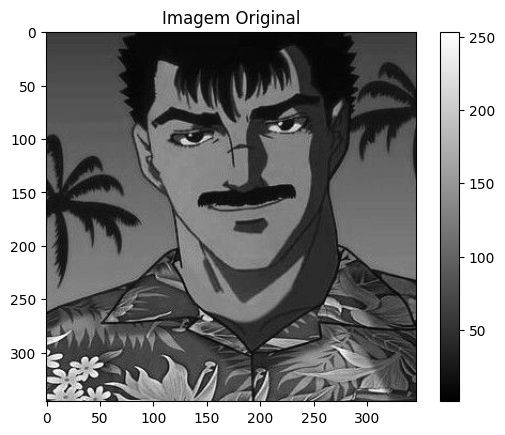

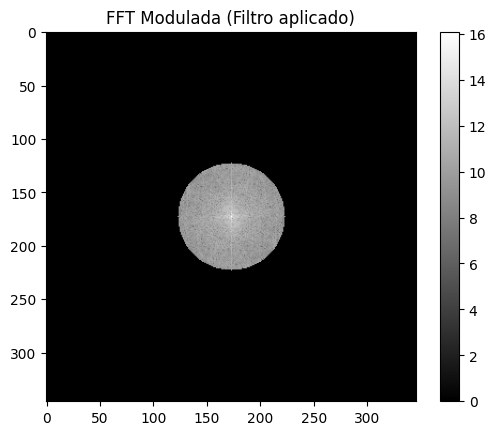

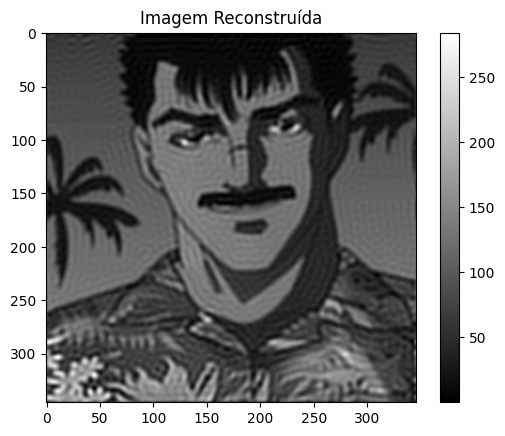

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Função 1: Calcula a FFT bidimensional de uma imagem
def fft_2d(image):
    return fftshift(fft2(image))  # Aplica FFT e centraliza as frequências

# Função 2: Define um filtro passa-baixa
def low_pass_filter(shape, cutoff_radius):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    filter_mask = np.zeros((rows, cols))

    for x in range(rows):
        for y in range(cols):
            distance = np.sqrt((x - center_row) ** 2 + (y - center_col) ** 2)
            if distance <= cutoff_radius:
                filter_mask[x, y] = 1

    return filter_mask

# Função 3: Aplica o filtro passa-baixa à FFT
def apply_filter(fft_image, filter_mask):
    return fft_image * filter_mask

# Função 4: Calcula a FFT inversa para reconstruir a imagem
def ifft_2d(filtered_fft):
    return np.abs(ifft2(ifftshift(filtered_fft)))  # Reconstrói e retorna valores reais

# Main: Processo de reconstrução
if __name__ == "__main__":
    # Carregar imagem em tons de cinza
    image = plt.imread('./guts.jpeg')  # Substituir pelo caminho da imagem
    if image.ndim == 3:  # Caso a imagem tenha 3 canais, converta para escala de cinza
        image = np.mean(image, axis=-1)

    # Exibir imagem original
    plt.figure()
    plt.title("Imagem Original")
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.show()

    # Passo 1: Calcular a FFT bidimensional
    fft_image = fft_2d(image)

    # Passo 2: Criar um filtro passa-baixa
    cutoff_radius = 50  # Definir o raio de corte do filtro
    filter_mask = low_pass_filter(fft_image.shape, cutoff_radius)

    # Passo 3: Aplicar o filtro à FFT
    filtered_fft = apply_filter(fft_image, filter_mask)

    # Passo 4: Calcular a FFT inversa para reconstruir a imagem
    reconstructed_image = ifft_2d(filtered_fft)

    # Exibir resultados
    plt.figure()
    plt.title("FFT Modulada (Filtro aplicado)")
    plt.imshow(np.log(np.abs(filtered_fft) + 1), cmap='gray')
    plt.colorbar()
    plt.show()

    plt.figure()
    plt.title("Imagem Reconstruída")
    plt.imshow(reconstructed_image, cmap='gray')
    plt.colorbar()
    plt.show()


## 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Definir o tempo e os sinais
t = np.linspace(0, 1, 1000, endpoint=False) # 1 segundo, 1000 amostras
f_t = np.sin(2 * np.pi * 10 * t) # f(t) = sin(2 * 10t)
g_t = np.cos(2 * np.pi * 5 * t) # g(t) = cos(2 * 5t)
# FFT dos sinais
F_f = np.fft.fft(f_t)
F_g = np.fft.fft(g_t)
# Multiplica¸c~ao no dom´ınio da frequ^encia
F_conv = F_f * F_g
# Transformada inversa para obter a convolu¸c~ao
conv_t = np.fft.ifft(F_conv)
# Plotar os sinais e a convolu¸c~ao
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, f_t, label="f(t) = sin(2 * 10t)")
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, g_t, label="g(t) = cos(2 * 5t)")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, np.real(conv_t), label="Convolu¸c~ao (f * g)(t)")
plt.legend()
plt.tight_layout()
plt.show()
